In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import netCDF4 as nc
import xarray as xr

import pandas as pd
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import matplotlib.pyplot as plt


## Badgery

## station data

In [2]:
df_bd = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/BadgerysCreek_HD01D_Data_067108_HourlyMaxWG.txt")

In [3]:
df_bd = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/BadgerysCreek_HD01D_Data_067108_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [4]:
df1=df_bd[df_bd['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]

df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [5]:
df5=df4.reset_index(drop=True)

In [6]:
test_bd = df5
test_bd["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18

In [7]:
import datetime
test_bd["Time"] = test_bd["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_bd["MM_1"].astype(str) + "-" + test_bd["DD_1"].astype(str) + "T" + test_bd['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_bd["clean_time"] = test_bd["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## Richmond

## station data

In [8]:
df_rich = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/Richmond_HD01D_Data_067105_HourlyMaxWG.txt")

In [9]:
df_rich = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/Richmond_HD01D_Data_067105_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [10]:
df1=df_rich[df_rich['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [11]:
df5=df4.reset_index(drop=True)

In [12]:
len(df5)

18162

In [13]:
test_ri = df5
test_ri["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18

len(test_ri)

18162

In [14]:
import datetime
test_ri["Time"] = test_ri["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_ri["MM_1"].astype(str) + "-" + test_ri["DD_1"].astype(str) + "T" + test_ri['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_ri["clean_time"] = test_ri["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## moree

## station data

In [15]:
df_moree = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/MoreeAirport_HD01D_Data_053115_HourlyMaxWG.txt")

In [16]:
df_moree = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/MoreeAirport_HD01D_Data_053115_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])


In [17]:
df1=df_moree[df_moree['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [18]:
df5=df4.reset_index(drop=True)

In [19]:
test_mo = df5
test_mo["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18


In [20]:
import datetime
test_mo["Time"] = test_mo["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_mo["MM_1"].astype(str) + "-" + test_mo["DD_1"].astype(str) + "T" + test_mo['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_mo["clean_time"] = test_mo["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## syd airport

## station data

In [21]:
df_sy = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/SydneyAirport_HD01D_Data_066037_HourlyMaxWG.txt")

In [22]:
df_sy = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/SydneyAirport_HD01D_Data_066037_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [23]:
df1=df_sy[df_sy['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]


In [24]:
df5=df4.reset_index(drop=True)

In [25]:
test_sy = df5
test_sy["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18


In [26]:
import datetime
test_sy["Time"] = test_sy["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_sy["MM_1"].astype(str) + "-" + test_sy["DD_1"].astype(str) + "T" + test_sy['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_sy["clean_time"] = test_sy["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


## tamworth

## station data

In [27]:
df_tm = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/TamworthAirport_HD01D_Data_055325_HourlyMaxWG.txt")

In [28]:
df_tm = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/TamworthAirport_HD01D_Data_055325_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])


In [29]:
df1=df_tm[df_tm['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [30]:
df5=df4.reset_index(drop=True)

In [31]:
test_tm = df5
test_tm["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18


In [32]:
import datetime
test_tm["Time"] = test_tm["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_tm["MM_1"].astype(str) + "-" + test_tm["DD_1"].astype(str) + "T" + test_tm['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_tm["clean_time"] = test_tm["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## wagga

In [33]:
## station data

In [34]:
df_wa = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/WaggaWagga_HD01D_Data_072150_HourlyMaxWG.txt")


In [35]:
df_wa = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/WaggaWagga_HD01D_Data_072150_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [36]:
df1=df_wa[df_wa['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [37]:
df5=df4.reset_index(drop=True)

In [38]:
test_wa = df5
test_wa["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18



In [39]:
import datetime
test_wa["Time"] = test_wa["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_wa["MM_1"].astype(str) + "-" + test_wa["DD_1"].astype(str) + "T" + test_wa['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_wa["clean_time"] = test_wa["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


## Loading diagnostics datasets

In [40]:
richmond_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Richmond/ric_dig.nc')
sydney_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Sydney/syd_dig.nc')
badgery_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Badgery/bad_dig.nc')
wagga_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Wagga/wag_dig.nc')
moree_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Moree/mor_dig.nc')
tamworth_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Tamworth/tam_dig.nc')

In [41]:
richmond_data = richmond_data_1.sel(lat = -33.60, lon = 150.78, method = 'nearest')
sydney_data = sydney_data_1.sel(lat =  -33.95, lon = 151.17, method = 'nearest')
badgery_data = badgery_data_1.sel(lat =  -33.90, lon = 150.73, method = 'nearest')
wagga_data = wagga_data_1.sel(lat =  -35.16, lon = 147.46, method = 'nearest')
moree_data = moree_data_1.sel(lat =  -29.49, lon = 149.85, method = 'nearest')
tamworth_data = tamworth_data_1.sel(lat =  -31.07, lon = 150.84, method = 'nearest')

In [42]:
variable_names = list(richmond_data.variables.keys())

# Display the array of variable names
print(variable_names)


['time', 'lon', 'lat', 'ml_cape', 'mu_cape', 'sb_cape', 'ml_cin', 'sb_cin', 'mu_cin', 'ml_lcl', 'mu_lcl', 'sb_lcl', 'eff_cape', 'eff_cin', 'eff_lcl', 'lr01', 'lr03', 'lr13', 'lr36', 'lr24', 'lr_freezing', 'lr_subcloud', 'lr700_500', 'qmean01', 'qmean03', 'qmean06', 'muq', 'ta500', 'ta850', 'dp850', 'qmean0500', 'q2m', 'qmeansubcloud', 'q_melting', 'q1', 'q3', 'q6', 'rhmin01', 'rhmin03', 'rhmin13', 'rhmean01', 'rhminsubcloud', 'tei', 'wbz', 'mhgt', 'mu_el', 'ml_el', 'sb_el', 'eff_el', 'pwat', 'v_totals', 'c_totals', 't_totals', 'te_diff', 'dpd850', 'dpd700', 'dcape', 'ddraft_temp', 'sfc_thetae', 'srhe_left', 'srh01_left', 'srh03_left', 'srh06_left', 'ebwd', 's010', 's06', 's03', 's01', 's13', 's36', 'scld', 'U500', 'U10', 'U1', 'U3', 'U6', 'Ust_left', 'Usr01_left', 'Usr03_left', 'Usr06_left', 'Uwindinf', 'Umeanwindinf', 'Umean800_600', 'Umean06', 'Umean01', 'Umean03', 'wg10', 'dcp', 'stp_cin_left', 'stp_fixed_left', 'scp', 'scp_fixed', 'ship', 'mlcape*s06', 'mucape*s06', 'sbcape*s06', '

In [43]:
variable_names = ['time','ml_cape', 'mu_cape', 'eff_cape', 'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 'mlcape*s06',  'ebwd',  's06',  'Umean800_600', 
                  'Umean06', 'wg10', 'dcp', 'scp',   'gustex', 'eff_sherb', 'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900' ]

In [44]:
df_wa = pd.DataFrame({var_name: wagga_data[var_name] for var_name in variable_names})
df_sy = pd.DataFrame({var_name: sydney_data[var_name] for var_name in variable_names})
df_mo = pd.DataFrame({var_name: moree_data[var_name] for var_name in variable_names})
df_tm = pd.DataFrame({var_name: tamworth_data[var_name] for var_name in variable_names})
df_bd = pd.DataFrame({var_name: badgery_data[var_name] for var_name in variable_names})
df_ri = pd.DataFrame({var_name: richmond_data[var_name] for var_name in variable_names})

In [45]:
new_frame_wa = test_wa.merge(df_wa,how='left', left_on='clean_time', right_on='time')
new_frame_wa_nad = new_frame_wa.dropna()

new_frame_sy = test_sy.merge(df_sy,how='left', left_on='clean_time', right_on='time')
new_frame_sy_nad = new_frame_sy.dropna()

new_frame_mo = test_mo.merge(df_mo,how='left', left_on='clean_time', right_on='time')
new_frame_mo_nad = new_frame_mo.dropna()

new_frame_tm = test_tm.merge(df_tm,how='left', left_on='clean_time', right_on='time')
new_frame_tm_nad = new_frame_tm.dropna()

new_frame_bd = test_bd.merge(df_bd,how='left', left_on='clean_time', right_on='time')
new_frame_bd_nad = new_frame_bd.dropna()

new_frame_ri = test_ri.merge(df_ri,how='left', left_on='clean_time', right_on='time')
new_frame_ri_nad = new_frame_ri.dropna()

In [46]:
# Merge DataFrames by column
dt_merged_df = pd.concat([new_frame_wa_nad, new_frame_sy_nad, new_frame_mo_nad,
                      new_frame_tm_nad, new_frame_bd_nad, new_frame_ri_nad], ignore_index = True)
#dt_merged_df

In [47]:
column_names = dt_merged_df.columns.tolist()

# Join the column names with commas
column_names_str = ', '.join(column_names)

# Print the column names
print("Column Names:", column_names_str)

Column Names: YearMonthDayHourMinutesInYYYY, MM_1, DD_1, HH24_1, MIFormatInUniversalCoordinatedTime, HH24, MIFormatInLocalStandardTime, MaxHourlyGustInKm_h, MaxHourlyGustInm_s, Time, clean_time, time, ml_cape, mu_cape, eff_cape, lr13, qmean01, rhmin03, ml_el, t_totals, dcape, q_melting, mlcape*s06, ebwd, s06, Umean800_600, Umean06, wg10, dcp, scp, gustex, eff_sherb, k_index, bdsd, inverted_v, ta900, rh900


In [48]:
# Extract the needed columns
selected_columns = ['MaxHourlyGustInm_s', 'mu_cape', 'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting',  's06',  'Umean800_600', 
                  'Umean06', 'wg10', 'dcp',  'gustex', 'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900' ]

# Create a new dataframe with only the selected columns
data_df = dt_merged_df.loc[:, selected_columns]

# Display the new dataframe
#data_df

### Multiplying rel hums with -1

In [49]:
columns_to_multiply = ['rhmin03', 'rh900']

# Create a new DataFrame with the selected columns multiplied by -1
new_df = data_df.copy()  # Create a copy of the original DataFrame
#new_df[columns_to_multiply] *= -1  # Multiply the selected columns by -1

# Optionally, you can also rename the columns if needed
# new_df.rename(columns={'column1': 'new_column1', 'column2': 'new_column2', 'column3': 'new_column3'}, inplace=True)

# Print the new DataFrame
new_df

,MaxHourlyGustInm_s,mu_cape,lr13,qmean01,rhmin03,ml_el,t_totals,dcape,q_melting,s06,Umean800_600,Umean06,wg10,dcp,gustex,k_index,bdsd,inverted_v,ta900,rh900
0,9.805556,0.0000,6.380859,5.409180,22.750977,2610.1250,39.312500,523.8750,2.236328,3.093750,2.546875,2.046875,11.375,0.000000,24.593750,16.567383,0.007812,3.226060,17.100006,37.500000
1,5.694444,0.0000,6.745117,5.341797,20.844727,2777.7500,40.488281,558.3125,1.881836,3.406250,2.132812,2.093750,10.625,0.000000,24.956055,15.728516,0.015625,-0.202211,18.350006,35.250000
2,6.694444,0.0000,6.983398,5.132812,18.839844,2973.7500,42.206055,737.1875,1.564453,3.648438,2.078125,2.179688,9.250,0.000000,25.207031,14.804688,0.015625,-3.170978,19.350006,31.875000
3,6.694444,0.0000,7.273438,5.789062,20.088867,2919.7500,45.108398,1095.3125,1.275391,6.742188,3.757812,3.000000,6.875,0.000000,28.668945,13.415039,0.031250,-8.009457,20.475006,33.374996
4,6.694444,0.0000,7.443359,5.600586,18.624023,3074.8750,45.863281,1164.5000,1.142578,6.468750,4.164062,3.226562,6.375,0.000000,28.149414,12.267578,0.031250,-7.650257,21.350006,30.624994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89292,8.194444,337.2500,6.449219,9.692383,41.548828,3373.1250,46.519531,828.6250,1.440430,3.437500,4.007812,3.640625,8.250,0.021056,30.680664,17.483398,0.117188,-26.152306,16.975006,69.000000
89293,7.694444,125.5625,6.580078,9.172852,39.207031,1870.7500,46.123047,844.8750,1.408203,3.406250,4.414062,3.328125,8.125,0.007254,29.593750,16.403320,0.132812,-24.793045,17.225006,64.750000
89294,9.305556,286.1250,6.343750,9.643555,41.767578,6240.7500,47.552734,876.6250,1.421875,2.531250,4.023438,3.726562,8.750,0.014283,29.818359,15.990234,0.093750,-24.856346,17.225006,67.625008
89295,8.694444,650.3125,5.879883,11.315430,53.918945,9075.1875,48.078125,851.6250,1.494141,1.875000,4.812500,3.976562,11.250,0.024860,28.459961,15.748047,0.039062,-24.960602,16.600006,76.250000


In [50]:
# new_df.drop(columns=['wg10'], inplace=True)
# new_df

In [51]:
new_df = new_df[new_df['MaxHourlyGustInm_s']>= 18]
new_df

,MaxHourlyGustInm_s,mu_cape,lr13,qmean01,rhmin03,ml_el,t_totals,dcape,q_melting,s06,Umean800_600,Umean06,wg10,dcp,gustex,k_index,bdsd,inverted_v,ta900,rh900
319,19.500000,2136.8750,8.415039,12.226562,35.375000,11548.5000,47.941406,1110.6250,5.168945,15.804688,8.320312,8.289062,7.625,1.873355,48.483398,38.466797,0.945312,11.592739,27.100006,45.500000
460,28.305556,317.6250,9.545898,7.082031,15.052734,6789.5000,49.986328,1356.7500,5.145508,18.031250,9.117188,7.851562,10.125,0.367603,46.449219,33.895508,0.960938,31.283594,29.600006,23.375000
752,18.000000,0.0000,6.700195,6.476562,31.670898,2163.1875,42.034180,272.8750,5.657227,31.382812,18.164062,17.820312,11.500,0.000000,49.722656,29.743164,0.609375,17.412134,17.475006,45.499992
782,19.000000,0.0000,6.320312,4.308594,26.792969,2052.3125,42.531250,534.3750,3.142578,24.750000,18.531250,17.578125,16.250,0.000000,47.107422,8.783203,0.132812,-11.834655,10.725006,47.375004
1018,18.500000,93.8125,9.497070,7.030273,19.968750,6031.2500,49.681641,1093.3750,5.355469,16.703125,13.960938,13.421875,12.250,0.138582,48.375977,34.120117,0.796875,28.609930,26.850006,27.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88581,19.000000,416.1250,9.025391,7.130859,24.288086,2866.4375,45.885742,1261.1250,3.492188,24.726562,22.757812,20.414062,15.875,1.596089,55.987305,32.342773,0.992188,5.982584,22.975006,34.375004
88728,24.694444,3888.3750,7.175781,16.040039,43.500000,12374.9375,52.912109,1090.2500,4.762695,33.218750,25.250000,18.648438,9.875,15.826150,51.199219,36.783203,1.000000,13.405159,27.100006,49.374996
89071,19.000000,444.3125,9.230469,9.317383,21.531250,9823.6875,44.149414,1003.7500,3.758789,12.328125,6.171875,5.140625,10.000,0.170311,42.487305,34.260742,0.843750,16.833469,28.975006,31.250000
89136,18.500000,1897.8125,6.298828,13.793945,72.750000,10808.6250,45.736328,219.0000,5.925781,19.296875,8.125000,6.484375,5.500,0.313428,34.778320,36.068359,0.859375,4.433323,17.975006,72.749992


In [52]:
new_column_names = ['station_speed', 'mu_cape',  'lapserate1_3',
       'qmean01', 'rhmin03', 'ml_el', 't_totals', 'dcape', 'q_melting',
      's06', 'Umean800_600', 'Umean06', 'barra_wind', 'dcp',
        'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900',
       'rh900']

# Assign the new column names to the DataFrame:
new_df.columns = new_column_names
new_df

,station_speed,mu_cape,lapserate1_3,qmean01,rhmin03,ml_el,t_totals,dcape,q_melting,s06,Umean800_600,Umean06,barra_wind,dcp,gustex,k_index,bdsd,inverted_v,ta900,rh900
319,19.500000,2136.8750,8.415039,12.226562,35.375000,11548.5000,47.941406,1110.6250,5.168945,15.804688,8.320312,8.289062,7.625,1.873355,48.483398,38.466797,0.945312,11.592739,27.100006,45.500000
460,28.305556,317.6250,9.545898,7.082031,15.052734,6789.5000,49.986328,1356.7500,5.145508,18.031250,9.117188,7.851562,10.125,0.367603,46.449219,33.895508,0.960938,31.283594,29.600006,23.375000
752,18.000000,0.0000,6.700195,6.476562,31.670898,2163.1875,42.034180,272.8750,5.657227,31.382812,18.164062,17.820312,11.500,0.000000,49.722656,29.743164,0.609375,17.412134,17.475006,45.499992
782,19.000000,0.0000,6.320312,4.308594,26.792969,2052.3125,42.531250,534.3750,3.142578,24.750000,18.531250,17.578125,16.250,0.000000,47.107422,8.783203,0.132812,-11.834655,10.725006,47.375004
1018,18.500000,93.8125,9.497070,7.030273,19.968750,6031.2500,49.681641,1093.3750,5.355469,16.703125,13.960938,13.421875,12.250,0.138582,48.375977,34.120117,0.796875,28.609930,26.850006,27.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88581,19.000000,416.1250,9.025391,7.130859,24.288086,2866.4375,45.885742,1261.1250,3.492188,24.726562,22.757812,20.414062,15.875,1.596089,55.987305,32.342773,0.992188,5.982584,22.975006,34.375004
88728,24.694444,3888.3750,7.175781,16.040039,43.500000,12374.9375,52.912109,1090.2500,4.762695,33.218750,25.250000,18.648438,9.875,15.826150,51.199219,36.783203,1.000000,13.405159,27.100006,49.374996
89071,19.000000,444.3125,9.230469,9.317383,21.531250,9823.6875,44.149414,1003.7500,3.758789,12.328125,6.171875,5.140625,10.000,0.170311,42.487305,34.260742,0.843750,16.833469,28.975006,31.250000
89136,18.500000,1897.8125,6.298828,13.793945,72.750000,10808.6250,45.736328,219.0000,5.925781,19.296875,8.125000,6.484375,5.500,0.313428,34.778320,36.068359,0.859375,4.433323,17.975006,72.749992


## Random Forest

In [53]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Data

import numpy as np
import pandas as pd

# Plotting

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Jupyter lab widgets

import ipywidgets as widgets
from IPython.display import display

# Scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [54]:
# Define a function to apply your condition
def modify_column_value(x):
    if x >= 25:
        return 1
    else:
        return 0

# Apply the function to the column
new_df['station_speed'] = new_df['station_speed'].apply(lambda x: modify_column_value(x))

/jobfs/140350861.gadi-pbs/ipykernel_86091/1225615240.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['station_speed'] = new_df['station_speed'].apply(lambda x: modify_column_value(x))


In [55]:
# file_path = "/g/data/up6/gs5098/BARRA_indices_time_series/new_df.csv"

# # Save the DataFrame to a CSV file
# new_df.to_csv(file_path, index=False)  # Set index=False if you don't want to write row indices


In [56]:
#new_df = pd.read_csv("/g/data/up6/gs5098/BARRA_indices_time_series/new_df.csv")

In [57]:
#new_df[new_df['MaxHourlyGustInm_s']==1]

In [58]:
#split dataset in features and target variable
# feature_cols = ['mu_cape',  'lr13', 
#                   'qmean01', 'rhmin03',  'ml_el', 't_totals',  
#                   'dcape', 'q_melting', 's06',  'Umean800_600', 
#                   'Umean06','wg10','dcp',  'gustex',  'k_index', 
#                   'bdsd', 'inverted_v', 'ta900','rh900']
feature_cols = ['mu_cape',  'lapserate1_3', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 's06',  'Umean800_600', 
                  'Umean06','barra_wind','dcp',  'gustex',  'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900']


#feature_cols = ['wg10']
target_cols = ['station_speed']

X = new_df[feature_cols] # Features
y = new_df[target_cols] # Target variable


### Splitting the data into train and test sets

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
print(X_train.shape, y_train.shape)

(793, 19) (793, 1)


In [61]:
print(X_test.shape, y_test.shape)

(340, 19) (340, 1)


### Training a RF and Predicting on test data using train model

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#weights = {0: 0.5221198156682028, 1: 11.002083333333334}

clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', class_weight = 'balanced',
                              max_depth = 3,
                             random_state=42, n_jobs = -1)

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions
predictions = clf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, predictions))


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.97      0.80      0.88       321
           1       0.16      0.63      0.25        19

    accuracy                           0.79       340
   macro avg       0.56      0.71      0.56       340
weighted avg       0.93      0.79      0.84       340



In [63]:
# # Obtain the OOB error 
# oob_error = 1 - clf.oob_score_ 
  
# # Print the OOB error 
# print(f'OOB error: {oob_error:.3f}') 

In [64]:
#clf.oob_score_

In [65]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

#Ploting the cunfusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[256,  65],
       [  7,  12]])

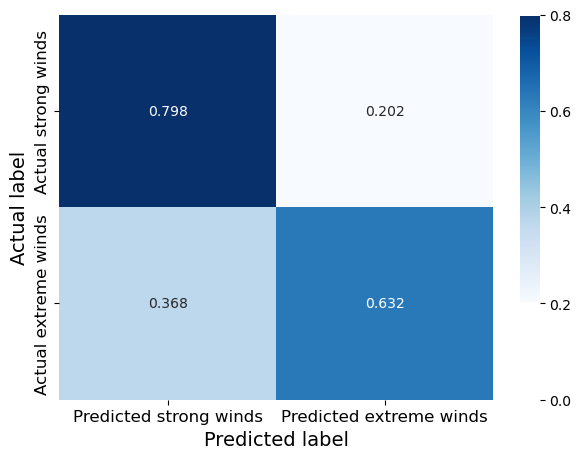

In [66]:
# Step 2: Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 3: Plotting the normalized confusion matrix
plt.figure(figsize=(7, 5))
sns_heatmap = sns.heatmap(cm_normalized, annot=True, fmt=".3f", cmap='Blues', 
            xticklabels=['Predicted strong winds', 'Predicted extreme winds'], 
            yticklabels=['Actual strong winds', 'Actual extreme winds'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = sns_heatmap.collections[0].colorbar
cbar.set_ticks(np.arange(0, 1, 0.2))
cbar.set_ticklabels([f"{x:.1f}" for x in np.arange(0, 1, 0.2)], 
                    fontsize=10) 

plt.ylabel('Actual label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
#plt.title('Normalized Confusion Matrix')
plt.show()

### Predicting on test data

In [67]:
# Predict on test data
y_pred = clf.predict(X_test)

# Display y_pred array
#print("Predicted classes for the test data:\n", y_pred)

# Calculate the number of droughts and non-droughts in y_pred
strongwind_count = np.sum(y_pred == 1)
weakwind_count = np.sum(y_pred == 0)

print(f"\nNumber of predicted strongwinds: {strongwind_count}")
print(f"Number of predicted weakwinds: {weakwind_count}")


Number of predicted strongwinds: 77
Number of predicted weakwinds: 263


In [68]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Accuracy: 0.7882
Precision: 0.1558
Recall: 0.6316
F1-score: 0.2500
Balanced Accuracy: 0.7145


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
rf_predictions = clf.predict(X_test)

# Probabilities for ROC-AUC
rf_probs = clf.predict_proba(X_test)[:, 1]

# Metrics
print("Random Forest Metrics:")
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))



Random Forest Metrics:
ROC-AUC: 0.8391539596655189


In [70]:
##Compute and store feat importance score over 50 random train-test test splits. 


n_iterations = 50
variable_importance = np.zeros((len(X.columns), n_iterations))

seeds= np.arange(n_iterations)
for i, seed in enumerate(seeds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', class_weight = 'balanced',
                              max_depth = 3,
                             random_state=seed, n_jobs = -1)
    clf.fit(X_train,y_train)

    variable_importance[:,i]=clf.feature_importances_
variable_importance_df = pd.DataFrame(variable_importance.T, columns=X.columns)   

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10

### Feat. importance

In [71]:
# import matplotlib.pyplot as plt

# plt.rcParams.update({
#     "font.size": 22,              # Default text size
#     "axes.titlesize": 22,         # Axes title
#     "axes.labelsize": 22,         # Axes x/y labels
#     "xtick.labelsize": 22,        # X tick labels
#     "ytick.labelsize": 22,        # Y tick labels
#     "legend.fontsize": 15,        # Legend
#     "figure.titlesize": 22        # Overall figure title
# })

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


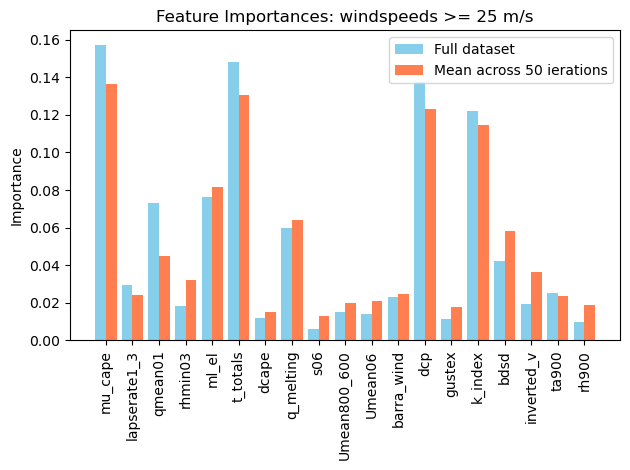

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate


feature_cols = ['mu_cape', 'lapserate1_3', 'qmean01', 'rhmin03', 'ml_el', 't_totals', 
                'dcape', 'q_melting', 's06', 'Umean800_600', 'Umean06', 'barra_wind',
                'dcp', 'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900', 'rh900']

clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', class_weight = 'balanced',
                              max_depth = 3,
                             random_state=42, n_jobs = -1)
#clf.fit(X_train,y_train)
#clf.fit(X_test,y_test)
clf.fit(X,y)
feature_importances_full = clf.feature_importances_



mean_importances = variable_importance_df.mean()
std_dev_importances_cv =  variable_importance_df.std() # Calculate standard deviation


# Plotting feature importances
fig, ax = plt.subplots()
index = np.arange(X.shape[1])  # Numerical index for x-axis
bar_width = 0.4

# Customize colors here
color_full_data = 'skyblue'  # Change color for full data bars
color_cv_mean = 'coral'  

rects1 = ax.bar(index - bar_width/2, feature_importances_full, bar_width, label='Full dataset', color=color_full_data)
rects2 = ax.bar(index + bar_width/2, mean_importances, bar_width, label='Mean across 50 ierations', color=color_cv_mean)

#ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances: windspeeds >= 25 m/s')
ax.set_xticks(index)
ax.set_xticklabels(feature_cols, rotation=90)  # Set feature names with rotation
ax.legend()

plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [91]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 34,              # Default text size
    "axes.titlesize": 34,         # Axes title
    "axes.labelsize": 34,         # Axes x/y labels
    "xtick.labelsize": 34,        # X tick labels
    "ytick.labelsize": 34,        # Y tick labels
    "legend.fontsize": 30,        # Legend
    "figure.titlesize": 34        # Overall figure title
})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


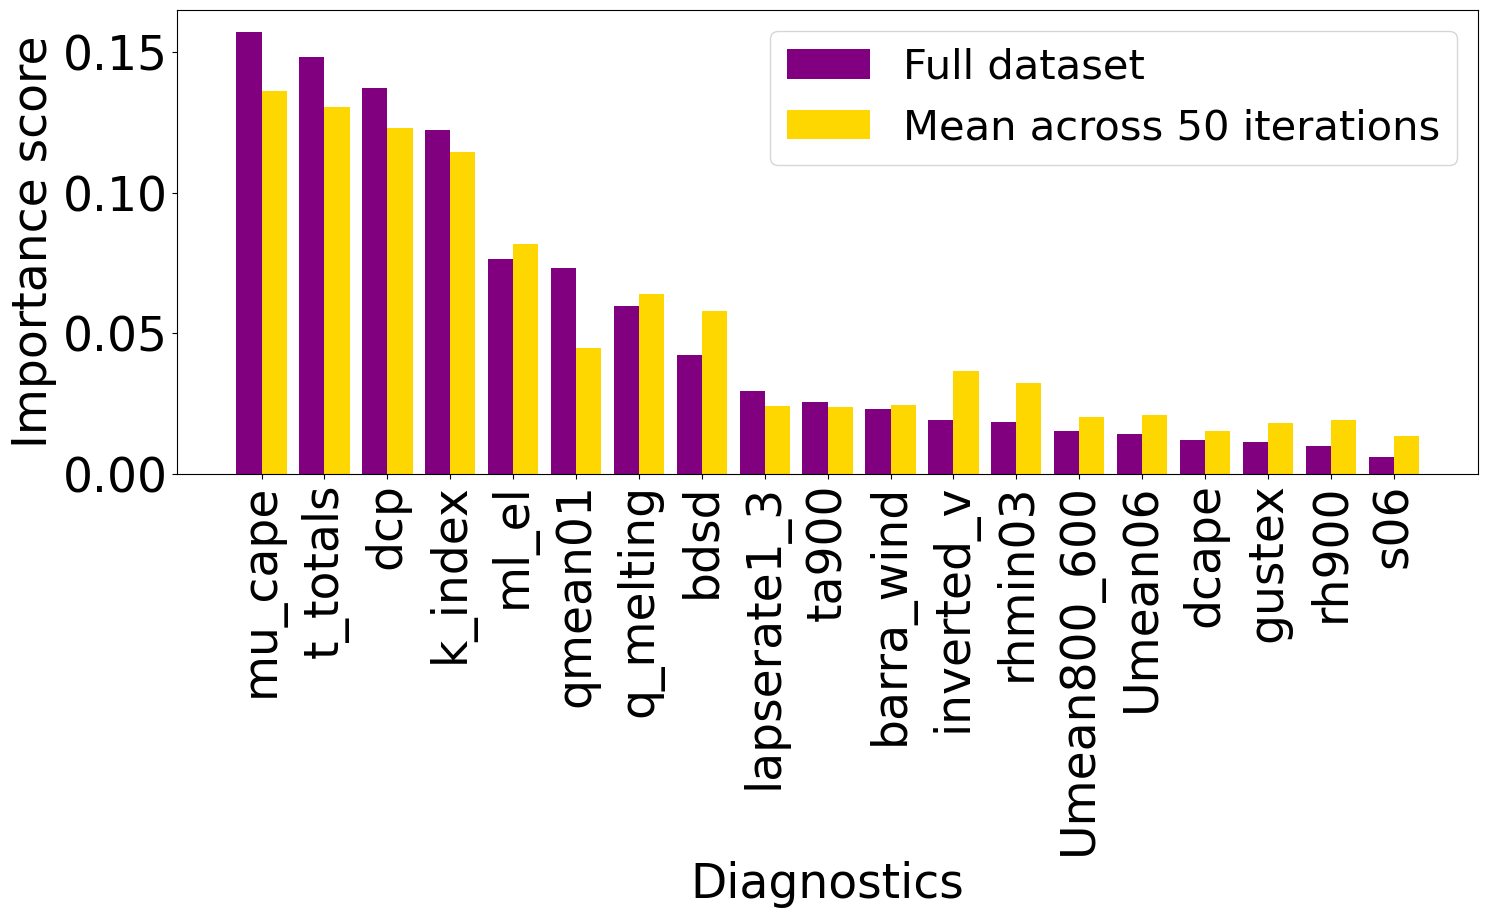

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feature_cols = ['mu_cape', 'lapserate1_3', 'qmean01', 'rhmin03', 'ml_el', 't_totals', 
                'dcape', 'q_melting', 's06', 'Umean800_600', 'Umean06', 'barra_wind',
                'dcp', 'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900', 'rh900']

clf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced',
                             max_depth=3, random_state=42, n_jobs=-1)
clf.fit(X, y)
#clf.fit(X_train,y_train)
feature_importances_full = clf.feature_importances_

mean_importances = variable_importance_df.mean()
std_dev_importances_cv = variable_importance_df.std()

# Sort features by full dataset importance
sorted_indices = np.argsort(feature_importances_full)[::-1]  # descending order

# Reorder all variables accordingly
feature_importances_full_sorted = feature_importances_full[sorted_indices]
mean_importances_sorted = mean_importances.iloc[sorted_indices]
std_dev_sorted = std_dev_importances_cv.iloc[sorted_indices]
feature_cols_sorted = [feature_cols[i] for i in sorted_indices]

# Plotting with sorted features
fig, ax = plt.subplots(figsize=(16, 10))
index = np.arange(len(feature_cols))
bar_width = 0.4

color_full_data = 'purple'
color_cv_mean = 'gold'

rects1 = ax.bar(index - bar_width / 2, feature_importances_full_sorted, bar_width,
                label='Full dataset', color=color_full_data)
rects2 = ax.bar(index + bar_width / 2, mean_importances_sorted, bar_width,
                label='Mean across 50 iterations', color=color_cv_mean)

ax.set_ylabel('Importance score')
ax.set_xlabel('Diagnostics')
ax.set_xticks(index)
ax.set_xticklabels(feature_cols_sorted, rotation=90)
ax.legend()

plt.tight_layout()

# Optional: Save high-resolution image
# plt.savefig("feature_importance_sorted.png", dpi=300)

plt.show()


### Testing with different seeds

In [132]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Number of seeds
n_seeds = 100

# DataFrame to hold feature importances
feature_importances = pd.DataFrame(index=range(n_seeds), columns=[f"Feature_{i}" for i in range(X.shape[1])])

# Loop over seeds
for i in range(n_seeds):
    # Set the random seed
    seed = i
    
    # Initialize the RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', class_weight = 'balanced',
                              max_depth = 3,
                             random_state=seed, n_jobs = -1)
    
    # Fit the model
    clf.fit(X, y)
    
    # Store the feature importances
    feature_importances.loc[i] = clf.feature_importances_

# Now 'feature_importances' contains the importances from each seed
print(feature_importances)

# Optional: Calculate average importance across all seeds
average_importances = feature_importances.mean(axis=0)
print(average_importances)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

   Feature_0 Feature_1 Feature_2 Feature_3 Feature_4 Feature_5 Feature_6  \
0   0.162181  0.019028   0.07315  0.036045  0.066258  0.106682  0.013092   
1   0.152473  0.026669  0.060092  0.034754    0.0974  0.140852  0.009521   
2   0.183106  0.025929  0.064982  0.024224  0.067498  0.144952  0.016156   
3   0.169915  0.013488  0.055479  0.029067  0.078594  0.136119  0.013341   
4   0.192977  0.019286  0.069555  0.045955  0.074394  0.135781  0.014483   
..       ...       ...       ...       ...       ...       ...       ...   
95   0.15574  0.015414  0.065397  0.032474  0.069692  0.164212  0.008588   
96   0.18434  0.026936  0.066413  0.039315  0.083136  0.162535  0.016688   
97  0.124733  0.026473  0.085005  0.029572  0.070449  0.166273  0.006028   
98  0.158095  0.015757  0.051899  0.034523   0.08706  0.163451   0.00697   
99  0.196228  0.027177  0.074845  0.022332  0.043398  0.130439  0.014342   

   Feature_7 Feature_8 Feature_9 Feature_10 Feature_11 Feature_12 Feature_13  \
0   0.0

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

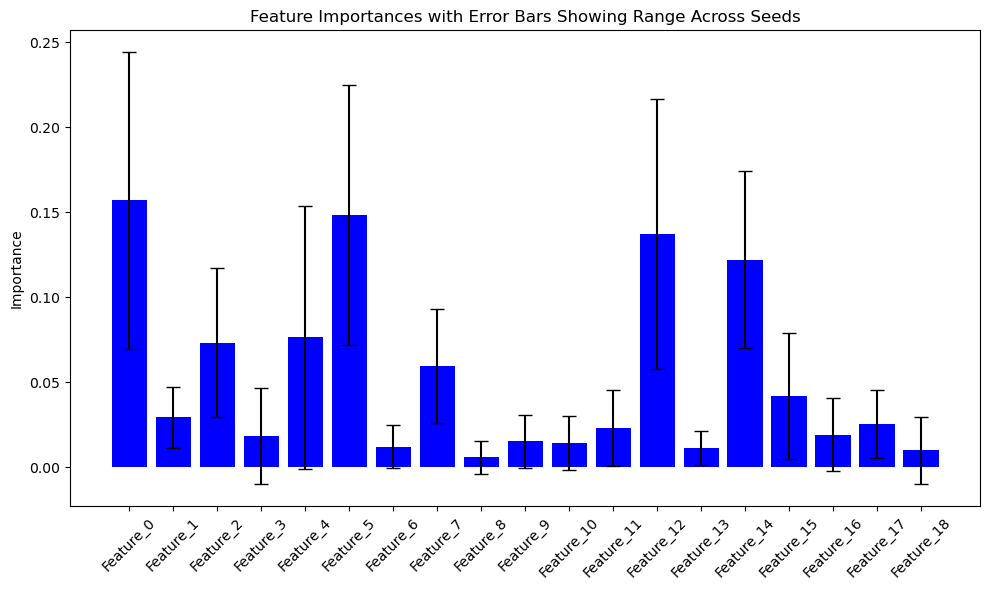

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Number of seeds
n_seeds = 20

# DataFrame to hold feature importances
feature_importances = pd.DataFrame(index=range(n_seeds), columns=[f"Feature_{i}" for i in range(X.shape[1])])

# Loop over seeds
for i in range(n_seeds):
    # Set the random seed
    seed = i
    
    # Initialize the RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced', max_depth=3, random_state=seed, n_jobs=-1)
    
    # Fit the model
    clf.fit(X, y)
    
    # Store the feature importances
    feature_importances.loc[i] = clf.feature_importances_

# Calculate min and max importances for error bars
min_importances = feature_importances.min()
max_importances = feature_importances.max()

# Calculate importances for a specific random state (42)
specific_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced', max_depth=3, random_state=42, n_jobs=-1)
specific_clf.fit(X, y)
specific_importances = specific_clf.feature_importances_

# Error bar ranges (min to max)
error_bars = [max_importances - min_importances]

# Plotting
plt.figure(figsize=(10, 6))
features = [f"Feature_{i}" for i in range(X.shape[1])]
plt.bar(features, specific_importances, color='b', yerr=error_bars, capsize=5)
plt.title('Feature Importances with Error Bars Showing Range Across Seeds')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cross validation

In [71]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

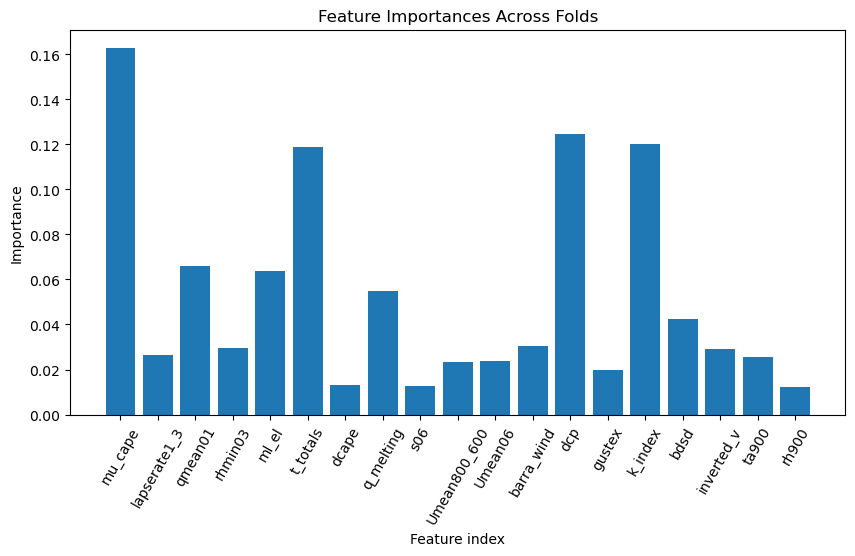

Cross-validated Metrics:
Accuracy: 0.728 ± 0.092
Precision: 0.084 ± 0.031
Recall: 0.524 ± 0.204
F1: 0.142 ± 0.051
Balanced_accuracy: 0.631 ± 0.077


In [72]:

# Setup Stratified K-Fold to maintain class distribution
cv = StratifiedKFold(n_splits=5)

# Custom scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_estimator=True)

# Extract feature importances from each fold
feature_importances = [estimator.feature_importances_ for estimator in cv_results['estimator']]

# Calculating average feature importances across folds
average_importances = np.mean(feature_importances, axis=0)

# Plotting feature importances
plt.figure(figsize=(10, 5))
plt.bar(X.columns, average_importances)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.xticks(rotation=60)
plt.title('Feature Importances Across Folds')
plt.show()

# Displaying metric results
print("Cross-validated Metrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy']:
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.3f} ± {np.std(cv_results['test_' + metric]):.3f}")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

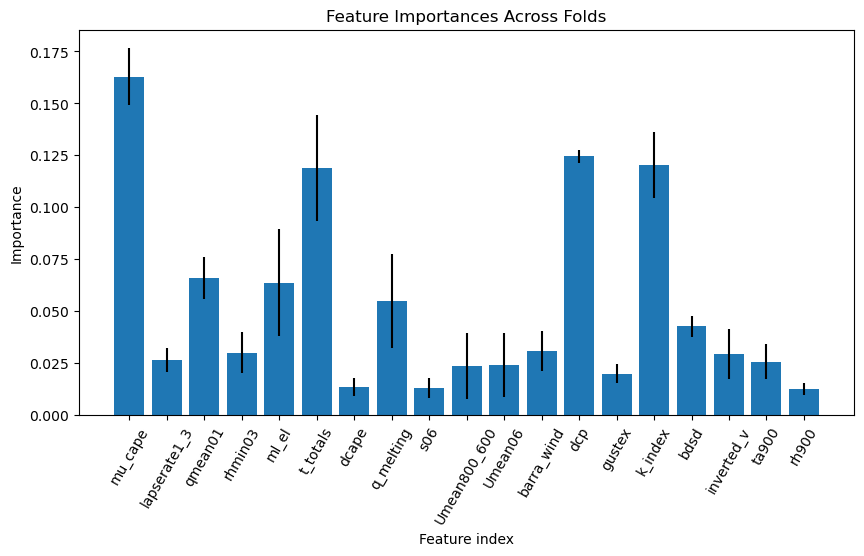

Cross-validated Metrics:
Accuracy: 0.728 ± 0.092
Precision: 0.084 ± 0.031
Recall: 0.524 ± 0.204
F1: 0.142 ± 0.051
Balanced_accuracy: 0.631 ± 0.077

Feature Importance Statistics:
Mean Importances: [0.16283975 0.02644893 0.06581656 0.02977201 0.06358645 0.11877664
 0.01329414 0.05475577 0.01258291 0.02338692 0.02393638 0.03056538
 0.1245624  0.01978405 0.12026101 0.04251489 0.02923773 0.025556
 0.01232207]
Standard Deviation: [0.01387339 0.00573991 0.01019246 0.00984857 0.02592852 0.02539468
 0.00449579 0.02250409 0.00480671 0.01597177 0.01558263 0.00950087
 0.00317729 0.00450229 0.01597679 0.00510484 0.01203549 0.0086143
 0.00286234]


In [73]:
# Setup Stratified K-Fold to maintain class distribution
cv = StratifiedKFold(n_splits=5)

# Custom scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_estimator=True)

# Extract feature importances from each fold
feature_importances = [estimator.feature_importances_ for estimator in cv_results['estimator']]

# Calculating average feature importances across folds
average_importances = np.mean(feature_importances, axis=0)
std_dev_importances = np.std(feature_importances, axis=0)

# Plotting feature importances
plt.figure(figsize=(10, 5))
plt.bar(X.columns, average_importances, yerr=std_dev_importances)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.xticks(rotation=60)
plt.title('Feature Importances Across Folds')
plt.show()

# Displaying metric results
print("Cross-validated Metrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy']:
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.3f} ± {np.std(cv_results['test_' + metric]):.3f}")



# Display feature importance statistics
print("\nFeature Importance Statistics:")
print(f"Mean Importances: {average_importances}")
print(f"Standard Deviation: {std_dev_importances}")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10

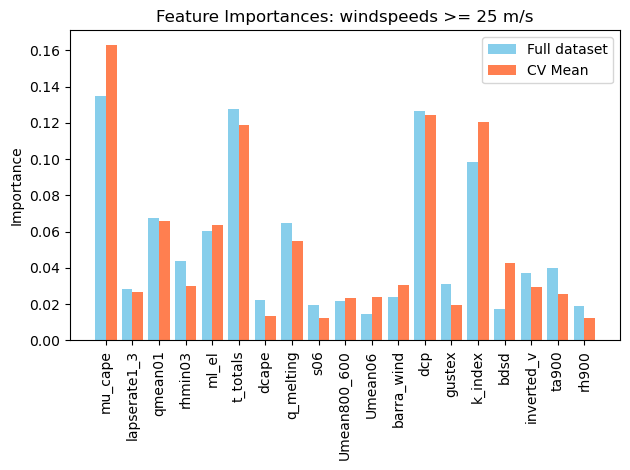

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

feature_cols = ['mu_cape', 'lapserate1_3', 'qmean01', 'rhmin03', 'ml_el', 't_totals', 
                'dcape', 'q_melting', 's06', 'Umean800_600', 'Umean06', 'barra_wind',
                'dcp', 'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900', 'rh900']

feature_importances_full = clf.feature_importances_

# Setup Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation and return estimators
cv_results = cross_validate(clf, X, y, cv=cv, return_estimator=True, n_jobs=-1)

# Extract feature importances from each fold
feature_importances_cv = np.array([est.feature_importances_ for est in cv_results['estimator']])
mean_importances_cv = np.mean(feature_importances_cv, axis=0)
std_dev_importances_cv = np.std(feature_importances_cv, axis=0)  # Calculate standard deviation


# Plotting feature importances
fig, ax = plt.subplots()
index = np.arange(X.shape[1])  # Numerical index for x-axis
bar_width = 0.4

# Customize colors here
color_full_data = 'skyblue'  # Change color for full data bars
color_cv_mean = 'coral'  

rects1 = ax.bar(index - bar_width/2, feature_importances_full, bar_width, label='Full dataset', color=color_full_data)
rects2 = ax.bar(index + bar_width/2, mean_importances_cv, bar_width, label='CV Mean', color=color_cv_mean)

#ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances: windspeeds >= 25 m/s')
ax.set_xticks(index)
ax.set_xticklabels(feature_cols, rotation=90)  # Set feature names with rotation
ax.legend()

plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [74]:
# Assuming you already have predictions and true labels (y_test)
predictions = clf.predict(X_test)  # or using a specific threshold as discussed previously
probabilities = clf.predict_proba(X_test)[:, 1]  # probabilities of the positive class

# Create a DataFrame for analysis
import pandas as pd
data = pd.DataFrame(X_test, columns=['mu_cape',  'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 's06',  'Umean800_600', 
                  'Umean06','wg10','dcp',  'gustex',  'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900'])  # adjust column names
data['True_Label'] = y_test
data['Predicted_Label'] = predictions
data['Probability'] = probabilities


In [75]:
# Filter out the errors
errors = data[(data['Predicted_Label'] != data['True_Label'])]
false_positives = errors[(errors['Predicted_Label'] == 1) & (errors['True_Label'] == 0)]
false_negatives = errors[(errors['Predicted_Label'] == 0) & (errors['True_Label'] == 1)]

# Examine common characteristics of these errors
print("Common features of false positives:")
print(false_positives.describe())

print("Common features of false negatives:")
print(false_negatives.describe())


Common features of false positives:
           mu_cape       lr13    qmean01    rhmin03         ml_el   t_totals  \
count    65.000000  65.000000  65.000000  65.000000     65.000000  65.000000   
mean   1050.927856   8.466091   9.717097  31.497881   8559.341797  50.597252   
std     728.770325   0.756385   2.027507   9.392785   2280.897217   2.901653   
min      31.375000   6.503906   5.121094  10.570312   1756.187500  45.066406   
25%     408.187500   7.829102   8.183594  25.542969   6561.937500  48.647461   
50%    1032.250000   8.498047   9.875000  32.000977   9254.750000  50.360352   
75%    1337.000000   9.048828  11.024414  36.852539  10139.687500  51.685547   
max    2924.500000   9.933594  14.402344  52.250000  12283.562500  58.799805   

             dcape  q_melting        s06  Umean800_600  ...        dcp  \
count    65.000000  65.000000  65.000000     65.000000  ...  65.000000   
mean    932.530762   4.531490  19.729927     13.467188  ...   1.461412   
std     394.023621   

/jobfs/114870890.gadi-pbs/ipykernel_2680907/606423498.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(false_positives['mu_cape'], label='False Positives')
/jobfs/114870890.gadi-pbs/ipykernel_2680907/606423498.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['True_Label'] == 1]['

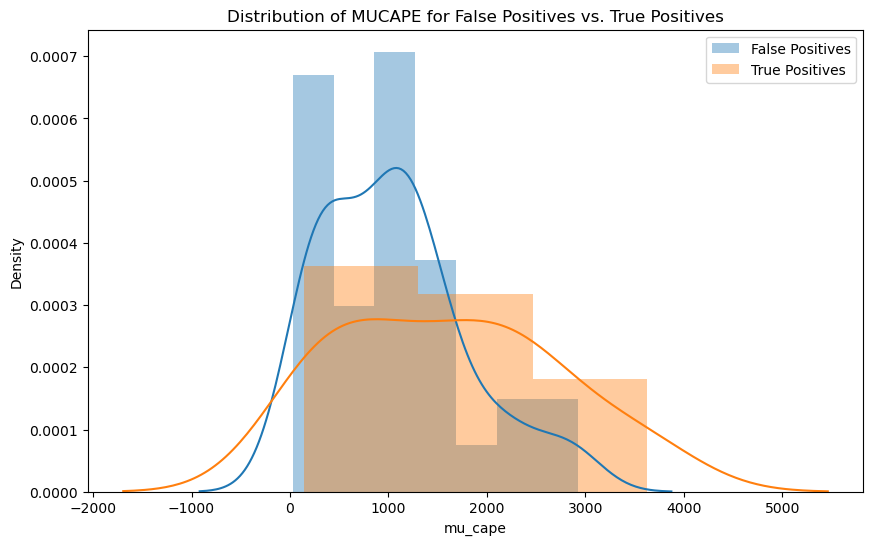

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(false_positives['mu_cape'], label='False Positives')
sns.distplot(data[data['True_Label'] == 1]['mu_cape'], label='True Positives')
plt.title(f'Distribution of MUCAPE for False Positives vs. True Positives')
plt.legend()
plt.show()

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Define a directory where the images will be saved
import os
save_dir = '/g/data/up6/gs5098/BARRA_indices_time_series/Extreme winds'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it does not exist

# Example: Plotting feature distributions for false positives
for feature in ['mu_cape',  'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 's06',  'Umean800_600', 
                  'Umean06','wg10','dcp',  'gustex',  'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900']:  # adjust according to your features
    plt.figure(figsize=(10, 6))
    sns.distplot(false_positives[feature], label='False Positives')
    sns.distplot(data[data['True_Label'] == 1][feature], label='True Positives')
    plt.title(f'Distribution of {feature} for False Positives vs. True Positives')
    plt.legend()
    # Save the figure
    file_path = os.path.join(save_dir, f'{feature}_distribution.png')
    plt.savefig(file_path)
    plt.close()  # Close the figure after saving to free up memory



### Confuson matrix for train dataset

First, ensure your Random Forest model is trained on the training dataset. After training the model, use it to make predictions on the same training dataset. This will help you evaluate how well the model has learned from the training data. Using the predictions and the actual labels from the training set, generate the confusion matrix.

In [69]:
# Predict on the training data
y_train_pred = clf.predict(X_train)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[742  22]
 [  0  29]]


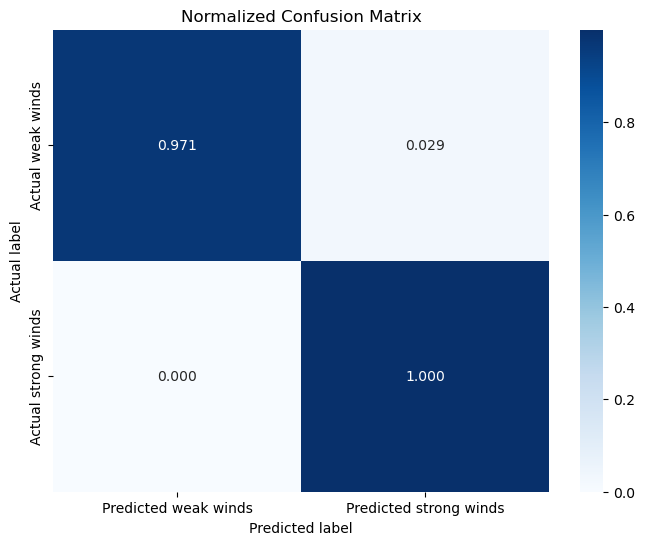

In [70]:
# Step 2: Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 3: Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns_heatmap = sns.heatmap(cm_normalized, annot=True, fmt=".3f", cmap='Blues', 
            xticklabels=['Predicted weak winds', 'Predicted strong winds'], 
            yticklabels=['Actual weak winds', 'Actual strong winds'])

cbar = sns_heatmap.collections[0].colorbar
cbar.set_ticks(np.arange(0, 1, 0.2))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()

## Calculating train scores

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your training data (x_train, y_train) and testing data (x_test, y_test)

# Predict on training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9722572509457755
Testing Accuracy: 0.8970588235294118


### Variable/Feature importances

Variable Importances:
 [0.13484645 0.02829897 0.06745103 0.04378849 0.0603855  0.12784802
 0.02236912 0.06484594 0.01955435 0.02194079 0.01482998 0.02399376
 0.12636772 0.03123996 0.09822734 0.01735856 0.03738002 0.04004545
 0.01922854]

Negative Importance Indicators:
 [False False False False False False False False False False False False
 False False False False False False False]

No predictors have negative importance values. All predictors provide some degree of predictability.


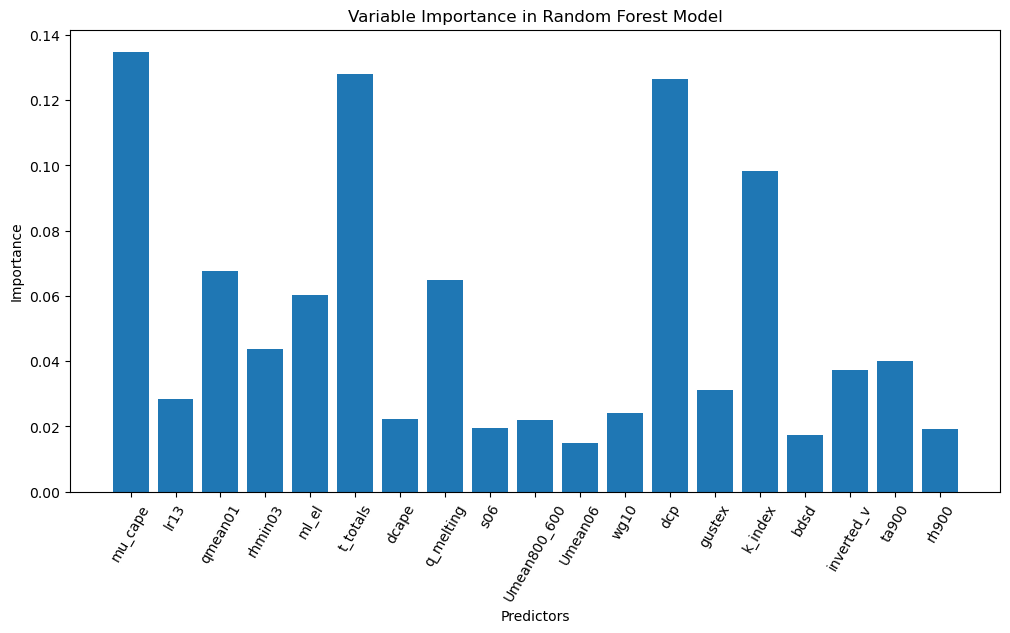

Ranking of predictors based on variable importance:
       Predictor  Variable Importance  Rank
0        mu_cape             0.134846     1
1       t_totals             0.127848     2
2            dcp             0.126368     3
3        k_index             0.098227     4
4        qmean01             0.067451     5
5      q_melting             0.064846     6
6          ml_el             0.060386     7
7        rhmin03             0.043788     8
8          ta900             0.040045     9
9     inverted_v             0.037380    10
10        gustex             0.031240    11
11          lr13             0.028299    12
12          wg10             0.023994    13
13         dcape             0.022369    14
14  Umean800_600             0.021941    15
15           s06             0.019554    16
16         rh900             0.019229    17
17          bdsd             0.017359    18
18       Umean06             0.014830    19


In [76]:
# Calculate variable importance using the Random Forest model
variable_importance = clf.feature_importances_

# Check if any variable importances are negative
negative_importance = variable_importance < 0

# Display variable importances and negative importance indicators
print("Variable Importances:\n", variable_importance)
print("\nNegative Importance Indicators:\n", negative_importance)

# Conclude if predictors with negative importances don't provide any predictability
if np.any(negative_importance):
    print("\nPredictors with negative importance values do not provide any predictability.")
else:
    print("\nNo predictors have negative importance values. All predictors provide some degree of predictability.")


# Create a bar graph of variable importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, variable_importance)
plt.xlabel('Predictors')
plt.xticks(rotation=60)
plt.ylabel('Importance')
plt.title('Variable Importance in Random Forest Model')
plt.show()

# To display the ranking of the predictors
# Get the indices that would sort the variable importance array in descending order
sorted_indices = np.argsort(variable_importance)[::-1]

# Create a DataFrame to display predictors and their rankings
ranking_df = pd.DataFrame({
    'Predictor': X.columns[sorted_indices],
    'Variable Importance': variable_importance[sorted_indices],
    'Rank': np.arange(1, len(X.columns) + 1)
})

# Print the ranking of predictors based on variable importance
print("Ranking of predictors based on variable importance:")
print(ranking_df)


### Training wih different seeds

#### Training Random Forest with different seeds and analysing the variability of the results helps to assess the stability and generalisability of the model, which are crucial aspects of building a reliable machine learning model.
This updated script performs a new train-test split in each iteration and calculates the mean performance metrics across the 20 iterations. This approach provides an even better assessment of the model's stability and generalisability by considering the variability introduced by different splits of the data.

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

Mean Accuracy: 0.757, SD: 0.027
Mean Precision: 0.098, SD: 0.033
Mean Recall: 0.565, SD: 0.138
Mean F1-score: 0.165, SD: 0.050
Mean Balanced Accuracy: 0.666, SD: 0.063


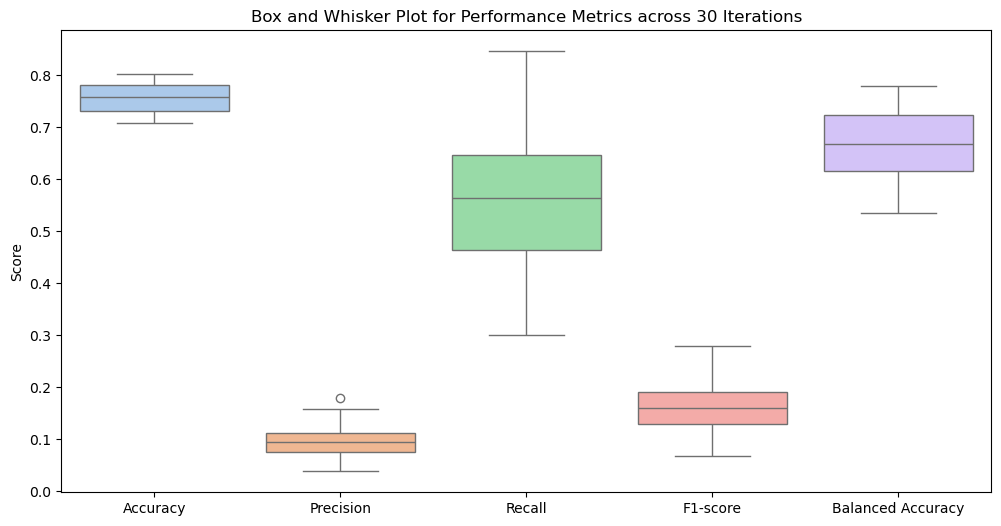

In [77]:
n_iterations = 30
seeds = np.arange(n_iterations)

# Initialize arrays to store performance metrics
accuracy_scores = np.zeros(n_iterations)
precision_scores = np.zeros(n_iterations)
recall_scores = np.zeros(n_iterations)
f1_scores = np.zeros(n_iterations)
balanced_accuracy_scores = np.zeros(n_iterations)

# Train the model and calculate performance metrics for each iteration
for i, seed in enumerate(seeds):
    # Split the data into training and testing sets for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Train the Random Forest model with a different seed
    clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', 
                              class_weight= 'balanced', max_depth = 3,
                             random_state=42, n_jobs = -1)
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy_scores[i] = accuracy_score(y_test, y_pred)
    precision_scores[i] = precision_score(y_test, y_pred)
    recall_scores[i] = recall_score(y_test, y_pred)
    f1_scores[i] = f1_score(y_test, y_pred)
    balanced_accuracy_scores[i] = balanced_accuracy_score(y_test, y_pred)

# Calculate the mean and standard deviation of performance metrics
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_balanced_accuracy = np.mean(balanced_accuracy_scores)
std_balanced_accuracy = np.std(balanced_accuracy_scores)

# Display mean and standard deviation of performance metrics
print(f"Mean Accuracy: {mean_accuracy:.3f}, SD: {std_accuracy:.3f}")
print(f"Mean Precision: {mean_precision:.3f}, SD: {std_precision:.3f}")
print(f"Mean Recall: {mean_recall:.3f}, SD: {std_recall:.3f}")
print(f"Mean F1-score: {mean_f1:.3f}, SD: {std_f1:.3f}")
print(f"Mean Balanced Accuracy: {mean_balanced_accuracy:.3f}, SD: {std_balanced_accuracy:.3f}")

# Create a DataFrame to store the performance metrics for each iteration
performance_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores,
    'Balanced Accuracy': balanced_accuracy_scores
})

# Draw a  box and whisker plot to display the results of each performance metric across 30 iterations
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, palette="pastel")
plt.ylabel('Score')
plt.title('Box and Whisker Plot for Performance Metrics across 30 Iterations')
plt.show()

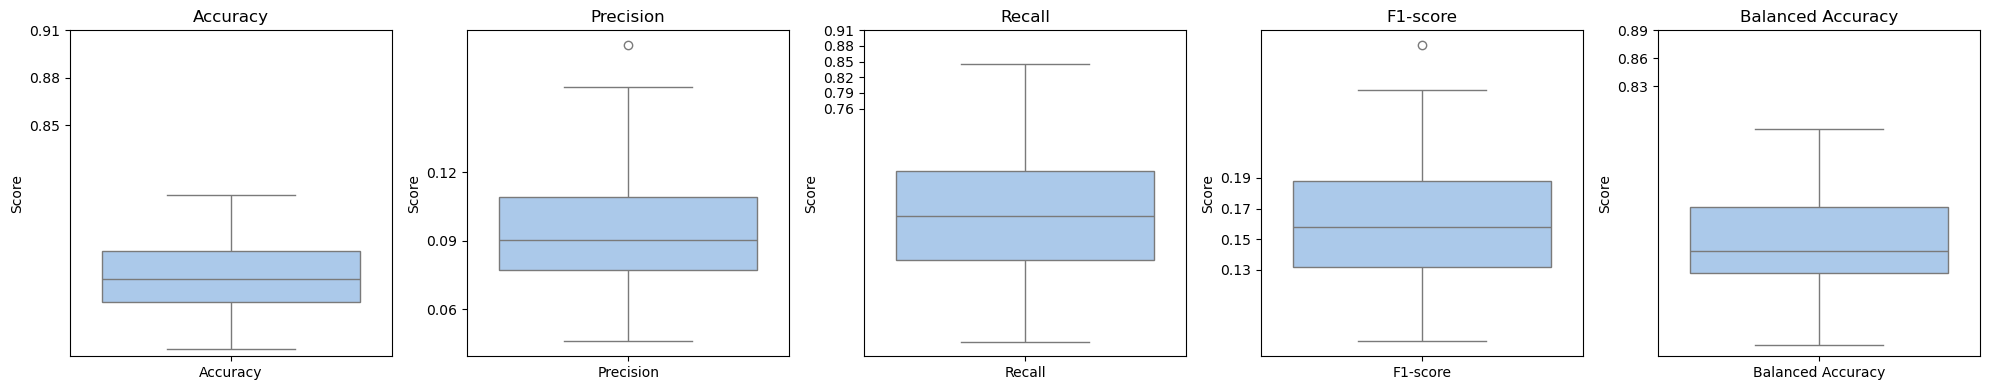

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have already computed the performance_df as you described in your code

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=False)  # Turn off sharing y-axis

# Titles for each subplot
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced Accuracy']

# Custom y-ticks for each subplot, you can adjust these based on the range of each metric
yticks = {
    'Accuracy': np.arange(0.85, 0.93,0.03),
    'Precision': np.arange(0.06, 0.13, 0.03),
    'Recall': np.arange(0.76,0.91, 0.03),
    'F1-score': np.arange(0.13,0.20, 0.02),
    'Balanced Accuracy': np.arange(0.83,0.90, 0.03)
}

# Plotting each metric in a separate subplot
for ax, column, title in zip(axes, performance_df.columns, titles):
    sns.boxplot(data=performance_df[[column]], ax=ax, palette="pastel")
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    ax.set_yticks(yticks[title])  # Set custom y-ticks
    ax.set_yticklabels(['{:.2f}'.format(y) for y in yticks[title]])  # Set y-tick labels with custom formatting

# Display the plot
plt.tight_layout()
plt.show()


## Logistic regression model

### Hyperparameter tuning

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Define model
model = LogisticRegression( class_weight='balanced', random_state= 42 )

# Define hyperparameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2',  'elasticnet', 'none'],
    'solver': ['liblinear','lbfgs', 'sag', 'saga'],
    'max_iter': [50, 100, 200,300,400]# 'liblinear' works well with 'l1' and 'l2'
}

# Setup grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1',  n_jobs=-1)

# Perform grid search
grid.fit(X, y)

# Best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-

Best parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.20660537847577615


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Fitting the model to the train dataset and predicting on the test dataset

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight


model = make_pipeline(StandardScaler(), LogisticRegression(C = 10, max_iter=200, penalty = 'l1',
                                                           solver ='saga' ,class_weight='balanced', 
                                                           random_state= 42))


# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {accuracy * 100:.3f}")


Logistic Regression model accuracy (in %): 70.294


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[231,  96],
       [  5,   8]])

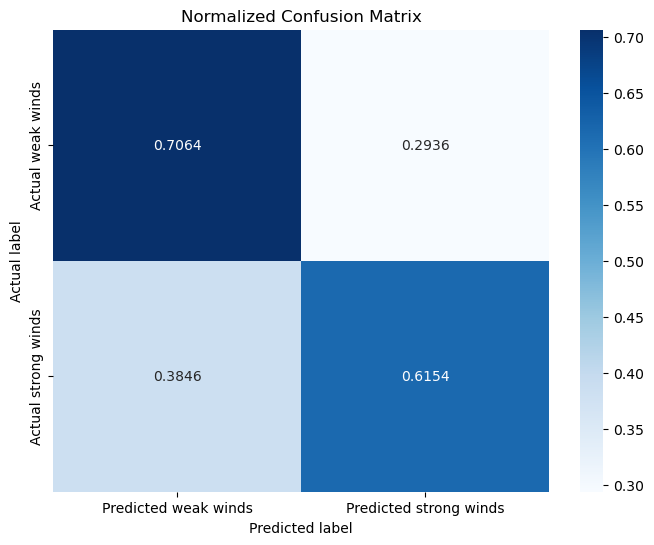

In [127]:
# Step 2: Normalize the confusion matrix
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Step 3: Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", cmap='Blues', 
            xticklabels=['Predicted weak winds', 'Predicted strong winds'], 
            yticklabels=['Actual weak winds', 'Actual strong winds'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
lr_predictions = model.predict(X_test)

# Probabilities for ROC-AUC
lr_probs = model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))
print("ROC-AUC:", roc_auc_score(y_test, lr_probs))


Logistic Regression Metrics:
Accuracy: 0.7029411764705882
Precision: 0.07692307692307693
Recall: 0.6153846153846154
F1 Score: 0.13675213675213677
ROC-AUC: 0.7624088449776523


### Cross validation

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np


In [132]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion ='entropy', 
                              class_weight= 'balanced', max_depth = 3,
                             random_state=42)

log_reg = LogisticRegression(C = 10, max_iter=200, penalty = 'l1',
                                                           solver ='saga' ,class_weight='balanced', 
                                                           random_state= 42)


In [136]:
kf = KFold(n_splits=20, shuffle=True, random_state=42)


In [137]:
# For accuracy
rf_accuracy = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
log_reg_accuracy = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

In [138]:
print("Random Forest - Accuracy: %0.3f (+/- %0.3f)" % (rf_accuracy.mean(), rf_accuracy.std() * 2))
print("Logistic Regression - Accuracy: %0.3f (+/- %0.3f)" % (log_reg_accuracy.mean(), log_reg_accuracy.std() * 2))


Random Forest - Accuracy: 0.702 (+/- 0.097)
Logistic Regression - Accuracy: 0.698 (+/- 0.284)
